# Data Preprocessing

In any Machine Learning process, Data Preprocessing is that step in which the data gets transformed, or Encoded, to bring it to such a state that now the machine can easily parse it. In other words, the features of the data can now be easily interpreted by the algorithm.

- Data Quality Assessment
- Feature Aggregation
- Feature Sampling
- Dimensionality Reduction
- Feature Encoding

[Towards Data Science](https://towardsdatascience.com/data-preprocessing-concepts-fa946d11c825)

## Outlier Detection

Outliers are extreme values that deviate from other observations on data , they may indicate a variability in a measurement, experimental errors or a novelty. In other words, an outlier is an observation that diverges from an overall pattern on a sample.

- Outlier values cause skewness in our dataset. Thus, we need to replace these outliers.


**How can we know the value is outlier ?**

- **1-) _Business insight_**
- **2-) _Standard deviation approach_**
    
    For example ;
    - mean + std
    - mean + 2 * std
- **3-) _Z score approach_**
    
    We can adjust the dataset for normal distribution. For example;
    - We can define the threshold +_ 2.5 times of the std. for our dataset
- **4-) _Boxplot (Interquartile range - IQR) Method_**
    
    Most common method for the industry. We can define the outliers for the Q1 and Q3.
    
    IQR = 1.5 * (Q3-Q1)
    
    Threshold 1 : Q1 - IQR
    
    Threshold 2: Q3 + IQR

[Towards Data Science](https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561)

In [54]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64", "int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [55]:
df_table = df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

<AxesSubplot:xlabel='table'>

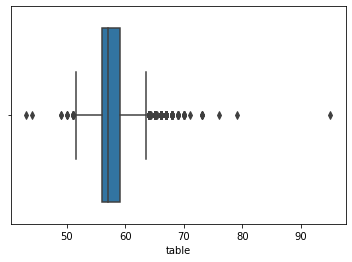

In [56]:
sns.boxplot(x=df_table)

In [57]:
# Lets define threshold for the dataset
# We will use Boxplot Method

Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = 1.5*(Q3-Q1) #interquartile
###############################
threshold_1 = Q1 - IQR
threshold_2 = Q3 + IQR

In [58]:
threshold_1

51.5

In [59]:
threshold_2

63.5

In [60]:
(df_table < threshold_1)|(df_table > threshold_2)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [61]:
outlier_1 = (df_table < threshold_1)
outlier_2 = (df_table > threshold_2)

In [62]:
# Let find outlier 1 indexes with fancy index
df_table[outlier_1].index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

In [63]:
df_table

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

#### Dropping the outliers value

In [64]:
import pandas as pd

In [65]:
type(df_table)

pandas.core.series.Series

In [66]:
df_table = pd.DataFrame(df_table)

In [67]:
df_table.shape

(53940, 1)

In [68]:
# Dropping the outliers
t_df = df_table[~((df_table < (threshold_1)) | (df_table > (threshold_2))).any(axis = 1)]

In [69]:
t_df.shape

(53335, 1)

In [70]:
t_df.head()

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0


#### Fill the outliers value with mean value

In [71]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64", "int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [72]:
df_table = df["table"]

In [73]:
outlier_1.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [74]:
df_table[outlier_1]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [75]:
df_table[outlier_1] = df_table.mean()

<ipython-input-75-1724ba4c016c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[outlier_1] = df_table.mean()


In [76]:
df_table[outlier_1]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

### Suppression Method

In [77]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64", "int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [78]:
df_table = df["table"]

In [79]:
threshold_1

51.5

In [80]:
df_table[outlier_1]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [81]:
df_table[outlier_1] = threshold_1

<ipython-input-81-020fea25462a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[outlier_1] = threshold_1


In [82]:
df_table[outlier_1]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

### Outlier Detection for Many Variables

#### Local Outlier Factor

It allows us to identify values that may be outliers by scoring the observations based on the density at their location.

The local density of a point is compared with its neighbors. If a point is significantly lower than the density of its neighbors, it can be interpreted that this point is in a less frequent area than its neighbors. Therefore, there is a neighborhood structure here. If the perimeter of a value is not dense, then this value is considered as an outlier.

In [108]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
diamonds = diamonds.select_dtypes(include = ['float64', 'int64']) 
df = diamonds.copy()
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [84]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [85]:
clf = LocalOutlierFactor(n_neighbors=20, contamination = 0.1)

In [86]:
# It will givve score value for the each data

# The score represent density score for each data
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [87]:
df_scores = clf.negative_outlier_factor_

In [88]:
df_scores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [89]:
# Lets check the first 20 score after sorting
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [90]:
threshold_value = np.sort(df_scores)[13]

In [91]:
outlier = df_scores > threshold_value

In [92]:
outlier

array([ True,  True,  True, ...,  True,  True,  True])

In [93]:
# Lets take the data that is not outlier
# We can call this method as deleting or dropping the outliers
n_df = df[df_scores > threshold_value]

In [94]:
n_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [95]:
df[df_scores < threshold_value]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [96]:
df[df_scores == threshold_value]

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


#### Suppression Method

In [97]:
supp_value = df[df_scores == threshold_value]

In [98]:
outliers = df[df_scores < threshold_value]

In [99]:
outliers = df[~outlier]

In [100]:
outliers

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [101]:
# When we suppress the outliers, we need to handle index problem
# So, lets get rid of the index
res = outliers.to_records(index = False)

In [102]:
res[:] = supp_value.to_records(index = False)

In [103]:
res

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [104]:
df[~outlier]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [105]:
df[~outlier] = pd.DataFrame(res, index = df[~outlier].index)

In [106]:
df[~outlier]

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19


## Missing Value Analysis

In statistics, missing data, or missing values, occur when no data value is stored for the variable in an observation. Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data. 

We shouldn't drop the missing data columns. Because we don't know the data source while gathering. We need to observe the randomness of the data to model our studies precisely.

- We need to check the dataset structure. For example:
    - There is no data for the customer's credit card expense
    - But, that persona has credit card.
- Null value (NaN) for the column always doesn't mean that there is a missing data. For example:
    - There is no data for the customer's credit card expense
    - But, that persona has credit card.
    - That means, we can issue 0 for the expense
- Loss of information. For example:
    - We have n_customerx100 customer dataset. One of the customers column has missing data. If we drop that row or customer, we will lose 99 columns information for our model.


**What are the type of missing value ?**

- Type I: Missing Completely at Random (MCAR)
    -There’s no relationship between whether a data point is missing and any values in the data set (missing or observed) .The missing data are just a random subset of the data .
- Type II: Missing at Random — (MAR)
    -The missing data here is affected only by the complete (observed ) variables and not by the characteristics of the missing data itself. in other words , for a data point , to be missing is not related to the missing data, but it is related to some of ( or all ) the observed data 
- Type III: Missing Not at Random — (MNAR).
    -It is nor Type I neither Type II , and the data will be missing based on the missing column itself , for instance the following example points out the fact that data are missing on IQ score with only the people having a low score .

**Testing the randomness of the missing value?**
- Visualization Techniques

- Unpaired T Test

- Correlation Test

- Little's MCAR Test


_Most common techniques are Visualization Techniques and Little's MCAR Test._

**_The idea of imputation is both seductive and dangerous (R.J.A Little & D.B Rubin)_**

**The Missing Value Analysis procedure performs three primary functions:**

- Describes the pattern of missing data. Where are the missing values located? How extensive are they? Do pairs of variables tend to have values missing in multiple cases? Are data values extreme? Are values missing randomly?
- Estimates means, standard deviations, covariances, and correlations for different missing value methods: listwise, pairwise, regression, or EM (expectation-maximization). The pairwise method also displays counts of pairwise complete cases.
- Fills in (imputes) missing values with estimated values using regression, ml or EM methods; however, multiple imputation is generally considered to provide more accurate results.
- Fills in methods: mean, median, hot deck, outsource data

Missing value analysis helps address several concerns caused by incomplete data. If cases with missing values are systematically different from cases without missing values, the results can be misleading. Also, missing data may reduce the precision of calculated statistics because there is less information than originally planned. Another concern is that the assumptions behind many statistical procedures are based on complete cases, and missing values can complicate the theory required.

**_Source:_** 
- [Wikipedia](https://en.wikipedia.org/wiki/Missing_data)
- [IBM Documentation](https://www.ibm.com/docs/en/spss-statistics/23.0.0?topic=option-missing-value-analysis)
- [Noteworthy Medium](https://blog.usejournal.com/missing-data-its-types-and-statistical-methods-to-deal-with-it-5cf8b71a443f)



### Easy Missing Data Solution

In [110]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [112]:
# Results will show us the null value number per each column
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [114]:
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [115]:
df.isnull().sum().sum()

7

In [116]:
df.isnull()

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [119]:
# Result will show us containing at least one missing value for each columns
df[df.isnull().any(axis=1)]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [120]:
df[df.notnull().all(axis=1)]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [121]:
df[df["V1"].notnull() & df["V2"].notnull() & df["V3"].notnull() ]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [122]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [123]:
# Dropping missing value directly
df.dropna() # inplace=True will delete permanently

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [124]:
# Filing the missing value
df["V1"]

0     1.0
1     3.0
2     6.0
3     NaN
4     7.0
5     1.0
6     NaN
7     9.0
8    15.0
Name: V1, dtype: float64

In [125]:
df["V1"].mean()

6.0

In [127]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [129]:
df["V1"].fillna(df["V1"].min())

0     1.0
1     3.0
2     6.0
3     1.0
4     7.0
5     1.0
6     1.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [131]:
df.apply(lambda x: x.fillna(x.mean()), axis = 0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


### Visualization Techniques

In [3]:
#!pip install missingno

In [133]:
import missingno as msno

<AxesSubplot:>

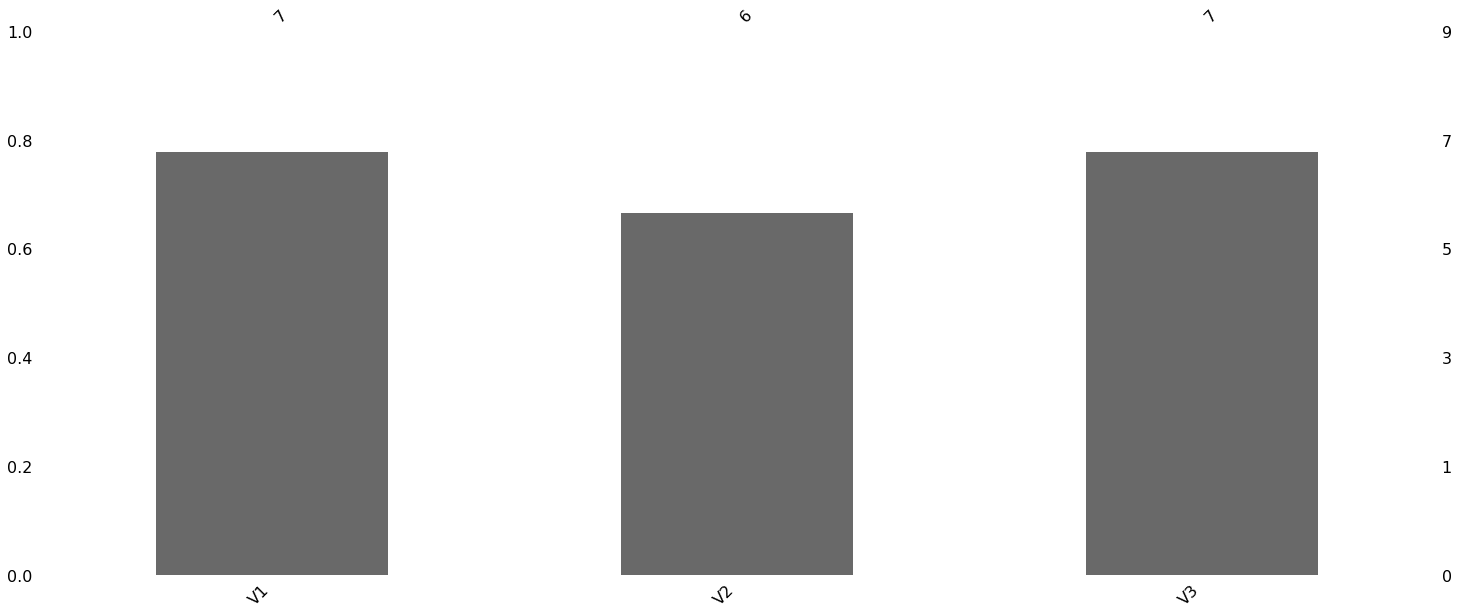

In [135]:
# It will show the missing value for each column using box plot
msno.bar(df)

<AxesSubplot:>

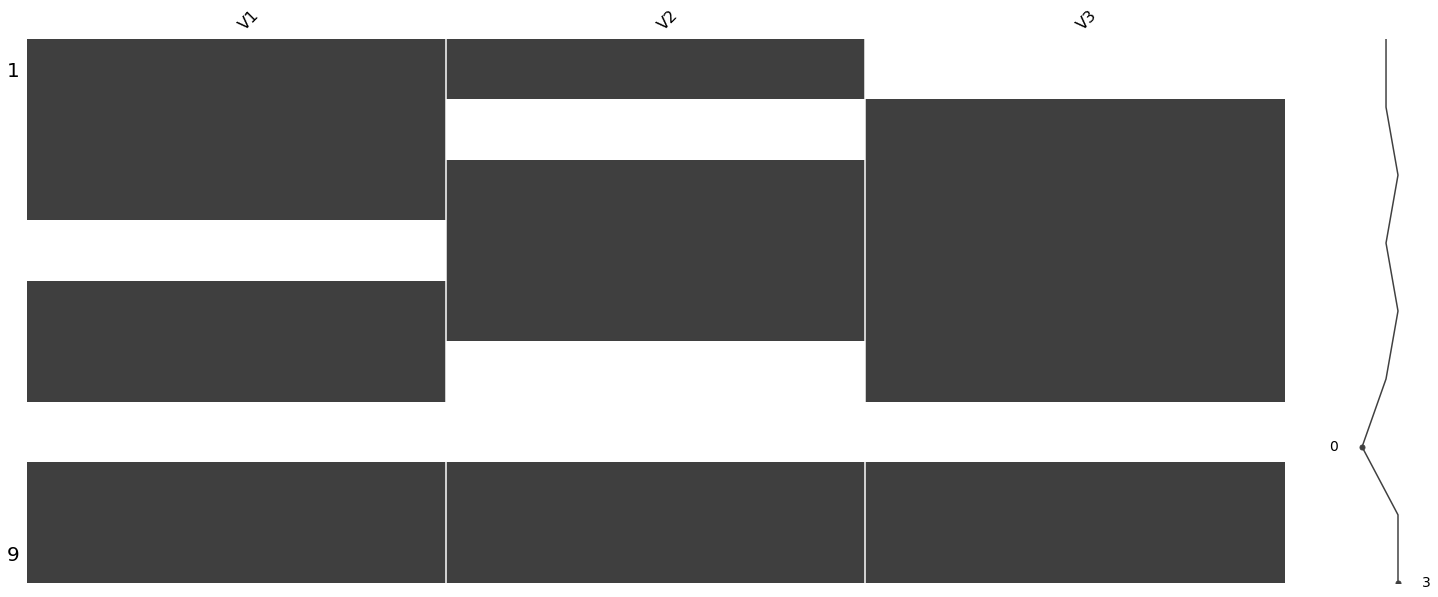

In [136]:
msno.matrix(df)

In [137]:
import seaborn as sns
df = sns.load_dataset("planets")
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [138]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

<AxesSubplot:>

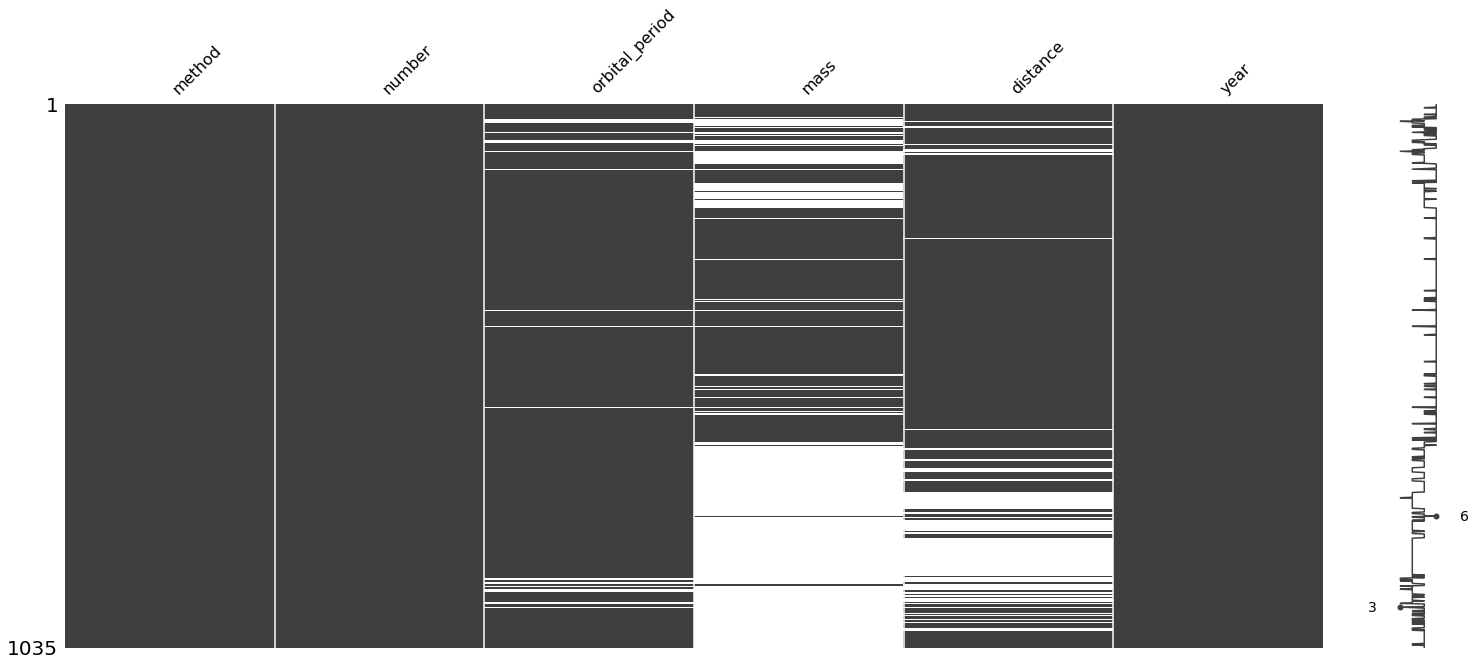

In [140]:
msno.matrix(df)
# The figure will show us there is a relationship between orbital_period and mass

<AxesSubplot:>

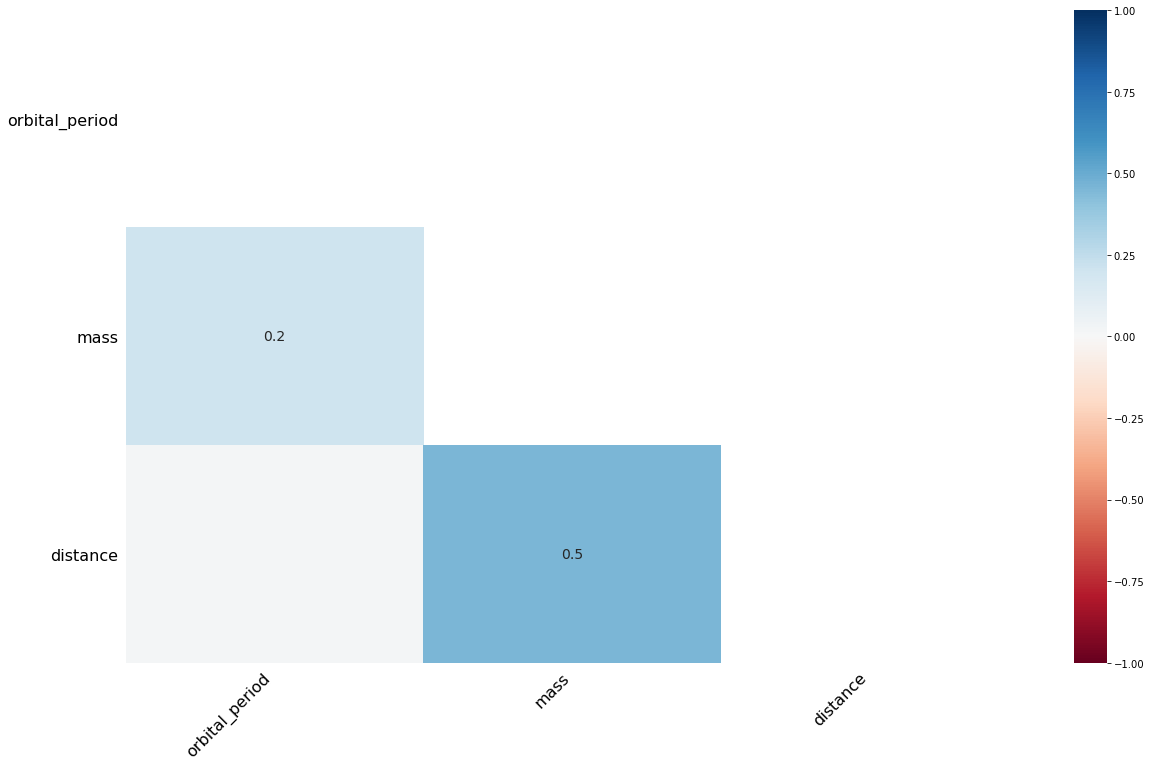

In [141]:
msno.heatmap(df)

### Dropping the Missing Values

In [142]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [145]:
df.dropna(axis = 0, how = "all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Filling Missing Values - Basic Valuation

In [146]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)


In [147]:
df["V1"].fillna(0)

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [148]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [149]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [150]:
# 1. method
df.apply(lambda x: x.fillna(x.mean()), axis = 0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [151]:
# 2. method
df.fillna(df.mean()[:])

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [153]:
df.fillna(df.mean()["V1":"V2"])

,V1,V2,V3
0,1.0,7.000000,NaN
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [157]:
df.fillna(df["V3"].median())

,V1,V2,V3
0,1.0,7.0,7.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,7.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,7.0,7.0
6,7.0,7.0,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [152]:
# 3. method
df.where(pd.notna(df), df.mean(), axis = "columns")

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


### Filling Missing Values - Categorical Dataset - Valuation

In [158]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","HR","HR","HR","HR","HR","IT","IT"])

df = pd.DataFrame(
        {"salary" : V1,
         "V2" : V2,
         "V3" : V3,
        "departmant" : V4}        
)

df

,salary,V2,V3,departmant
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,HR
3,NaN,8.0,6.0,HR
4,7.0,12.0,14.0,HR
5,1.0,NaN,7.0,HR
6,NaN,NaN,NaN,HR
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [159]:
df.groupby("departmant")["salary"].mean()

departmant
HR    4.666667
IT    7.000000
Name: salary, dtype: float64

In [163]:
df["salary"].fillna(df.groupby("departmant")["salary"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: salary, dtype: float64

### Filling Missing Values - Categorical Value - Valuation

In [174]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"IK","IK","IK","IK","IK","IT","IT"], dtype=object)

df = pd.DataFrame(
        {"salary" : V1,
        "departmant" : V4}        
)

df

,salary,departmant
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [175]:
df["departmant"].mode()[0]

'IK'

In [176]:
# Most common method for filling the categorical dataset is taking the mod of the categorical column
df["departmant"].fillna(df["departmant"].mode()[0])

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departmant, dtype: object

In [177]:
df

,salary,departmant
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [179]:
# Filling missing categorical value the one before value
df["departmant"].fillna(method = "bfill")

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departmant, dtype: object

In [181]:
# Filling the missing value with the next value
df["departmant"].fillna(method = "ffill")

0    IT
1    IT
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departmant, dtype: object

### Estimation Based Filling the Missing Value

In [4]:
# KNN Method
import seaborn as sns
import missingno as msno
df=sns.load_dataset("titanic")
df = df.select_dtypes(include=['float64', 'int64'])

In [ ]:
!pip install ycimpute

In [205]:
from ycimpute.imputer import knnimput

In [206]:
var_names = list(df)

In [207]:
n_df = np.array(df)

In [208]:
n_df[0:10]

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583],
       [ 0.    ,  1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 0.    ,  3.    ,  2.    ,  3.    ,  1.    , 21.075 ],
       [ 1.    ,  3.    , 27.    ,  0.    ,  2.    , 11.1333],
       [ 1.    ,  2.    , 14.    ,  1.    ,  0.    , 30.0708]])

In [209]:
n_df.shape

(891, 6)

In [210]:
dff = knnimput.KNN(k = 4).complete(n_df)

Imputing row 1/891 with 0 missing, elapsed time: 0.090
Imputing row 101/891 with 0 missing, elapsed time: 0.091
Imputing row 201/891 with 0 missing, elapsed time: 0.092
Imputing row 301/891 with 1 missing, elapsed time: 0.093
Imputing row 401/891 with 0 missing, elapsed time: 0.093
Imputing row 501/891 with 0 missing, elapsed time: 0.094
Imputing row 601/891 with 0 missing, elapsed time: 0.095
Imputing row 701/891 with 0 missing, elapsed time: 0.096
Imputing row 801/891 with 0 missing, elapsed time: 0.097


In [211]:
type(dff)

numpy.ndarray

In [212]:
dff = pd.DataFrame(dff, columns= var_names)

In [213]:
type(dff)

pandas.core.frame.DataFrame

In [214]:
dff

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.000000,1.0,0.0,7.2500
1,1.0,1.0,38.000000,1.0,0.0,71.2833
2,1.0,3.0,26.000000,0.0,0.0,7.9250
3,1.0,1.0,35.000000,1.0,0.0,53.1000
4,0.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...
886,0.0,2.0,27.000000,0.0,0.0,13.0000
887,1.0,1.0,19.000000,0.0,0.0,30.0000
888,0.0,3.0,26.026414,1.0,2.0,23.4500
889,1.0,1.0,26.000000,0.0,0.0,30.0000


In [215]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [216]:
# Random Forest
import seaborn as sns
import missingno as msno
df=sns.load_dataset("titanic")
df = df.select_dtypes(include=['float64', 'int64'])

In [218]:
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [221]:
var_names= list(df)

In [222]:
n_df = np.array(df)

In [ ]:
from ycimpute.imputer import iterforest
dff = iterforest.complete(n_df)

In [ ]:
dff = pd.DataFrame(dff, columns = var_names)

In [ ]:
dff.isnull().sum()

In [227]:
# EM Method
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])

In [228]:
from ycimpute.imputer import EM

In [229]:
var_names = list(df)

In [230]:
n_df = np.array(df)

In [231]:
dff = EM().complete(n_df)

In [232]:
dff = pd.DataFrame(dff, columns = var_names)

In [233]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

## Data Standardisation

In [234]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})

df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


### Standardisation

In [2]:
from sklearn import preprocessing

In [236]:
preprocessing.scale(df)

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

In [237]:
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


### Normalisation

In [238]:
preprocessing.normalize(df)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

### Min-Max Scaler (Transforming)

In [242]:
scaler= preprocessing.MinMaxScaler(feature_range=(10,20))
scaler.fit_transform(df)

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [16.66666667, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

## Variable Transformation

In [243]:
import seaborn as sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 0-1 Transforming

In [244]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [247]:
# Assign 0 and 1 to the sex column
df["n_sex"] = lbe.fit_transform(df["sex"])

In [249]:
# Female = 0, Male = 1
df

,total_bill,tip,sex,smoker,day,time,size,n_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


### 1 and others(0) Data Transorming

In [252]:
# Sunday = 1, others = 0
df['n_day'] = np.where(df["day"].str.contains('Sun'), 1, 0)

In [256]:
df

,total_bill,tip,sex,smoker,day,time,size,n_sex,n_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0


### Multi-class Data Transforming

In [257]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [258]:
lbe.fit_transform(df["day"])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

### One-Hot Encoding
**!! Important Note !!!**

- While transforming the categorical value to the numerical value, it can change our model and it can make noise in our data.


- Because of that reason, we need to use one-hot encoding

In [259]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,n_sex,n_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1


In [260]:
df_one_hot = pd.get_dummies(df, columns = ["sex"], prefix = ["sex"])

In [261]:
df_one_hot

,total_bill,tip,smoker,day,time,size,n_sex,n_day,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,1,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,1,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,1,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,1,0,1,0
240,27.18,2.00,Yes,Sat,Dinner,2,0,0,0,1
241,22.67,2.00,Yes,Sat,Dinner,2,1,0,1,0
242,17.82,1.75,No,Sat,Dinner,2,1,0,1,0


In [262]:
pd.get_dummies(df, prefix=['day'], columns=['day'])

,total_bill,tip,sex,smoker,time,size,n_sex,n_day,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,1,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,1,1,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,1,1,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,1,1,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Dinner,3,1,0,0,0,1,0
240,27.18,2.00,Female,Yes,Dinner,2,0,0,0,0,1,0
241,22.67,2.00,Male,Yes,Dinner,2,1,0,0,0,1,0
242,17.82,1.75,Male,No,Dinner,2,1,0,0,0,1,0
